# G.A.N
> Generative Adversial Network:
> -  The main focus for GAN is to generate data from scratch.
> -  It brings us closer to understanding intelligence.
- It trains two deep networks, called Generator and Discriminator, that compete and cooperate with each other. In the course of training, both networks eventually learn how to perform their tasks.
> > - The generator never actually sees examples from the domain and is adapted based on how well the discriminator performs.

[Original Article: How to Develop a 1D GAN](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)

In [1]:
# The Import Statements:
from matplotlib import pyplot
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


### Defining a 1 D function:
> y=f(x)

In [2]:
def function_1D(x):
    return x*x

In [3]:
inputs=np.arange(-0.5,0.6,0.1)
outputs=[function_1D(x) for x in inputs]

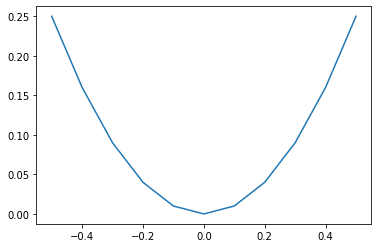

In [4]:
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

In [5]:
#Defining random values
def generate_samples(n=100):
    x1=np.random.rand(n)-0.5
    x2=x1*x1
    x1=x1.reshape(n,1)
    x2=x2.reshape(n,1)
    return np.hstack((x1,x2))

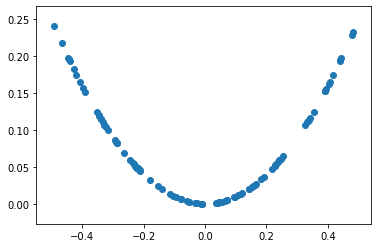

In [6]:
# generate samples and plotting them
data = generate_samples()

pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# Note:
> *a sample is comprised of a vector with two elements, one for the input and one for the output of our one-dimensional function.*

### The Discriminator
- The difference from a typical CNN is the absence of max-pooling in between layers.
- will have 1 hidden layer with 25 nodes.
- will use the ReLU activation function
- The output layer will have 1 node for the binary classification using the sigmoid activation function.
- Loss Function: Binary Cross Entropy
- Optimizer : Adam version of stochastic Gradient Descent

In [7]:
#Code for the Discriminator Unit:
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [8]:
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [9]:
def generate_real_samples(n):
    x1=np.random.rand(n)-0.5
    x2=x1*x1
    x1=x1.reshape(n,1)
    x2=x2.reshape(n,1)
    X= np.hstack((x1,x2))
    y=np.ones((n,1))
    return X,y

In [10]:
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + np.random.rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + np.random.rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = np.hstack((X1, X2))
	# generate class labels
	y = np.zeros((n, 1))
	return X, y

In [11]:
#training the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

In [12]:
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.5 0.15625
1 0.546875 0.25
2 0.578125 0.21875
3 0.5625 0.21875
4 0.640625 0.234375
5 0.515625 0.40625
6 0.515625 0.46875
7 0.59375 0.390625
8 0.5625 0.46875
9 0.53125 0.4375
10 0.46875 0.484375
11 0.421875 0.53125
12 0.46875 0.484375
13 0.515625 0.5625
14 0.46875 0.6875
15 0.5625 0.515625
16 0.515625 0.53125
17 0.53125 0.5
18 0.484375 0.609375
19 0.40625 0.5
20 0.46875 0.671875
21 0.484375 0.59375
22 0.546875 0.609375
23 0.375 0.53125
24 0.421875 0.53125
25 0.34375 0.65625
26 0.421875 0.484375
27 0.421875 0.578125
28 0.328125 0.546875
29 0.359375 0.640625
30 0.4375 0.609375
31 0.296875 0.484375
32 0.296875 0.53125
33 0.515625 0.625
34 0.359375 0.59375
35 0.40625 0.65625
36 0.359375 0.6875
37 0.28125 0.578125
38 0.328125 0.578125
39 0.328125 0.671875
40 0.40625 0.671875
41 0.296875 0.515625
42 0.296875 0.578125
43 0.296875 0.625
44 0.34375 0.625
45 0.390625 0.671875
46 0.375 0.609375
47 0.34375 0.59375
48 0.359375 0.578125
49 0.359375 0.6875
50 0.34375 0.65625
51 0.375 0.515625
52 0.

435 0.96875 0.90625
436 0.9375 0.953125
437 0.96875 0.953125
438 0.953125 0.890625
439 0.921875 0.953125
440 0.953125 0.90625
441 0.90625 0.984375
442 0.96875 0.96875
443 0.984375 0.9375
444 0.921875 0.9375
445 0.96875 0.90625
446 0.921875 0.96875
447 0.890625 0.875
448 0.953125 0.953125
449 0.984375 0.953125
450 0.921875 0.953125
451 1.0 0.90625
452 0.984375 0.96875
453 1.0 0.90625
454 0.953125 0.953125
455 0.96875 0.9375
456 0.953125 0.90625
457 1.0 0.921875
458 0.984375 0.96875
459 0.984375 0.90625
460 0.984375 0.984375
461 1.0 0.921875
462 0.984375 0.953125
463 0.96875 0.921875
464 1.0 0.921875
465 0.984375 0.859375
466 1.0 0.90625
467 1.0 0.890625
468 1.0 0.90625
469 1.0 0.875
470 1.0 0.84375
471 1.0 0.875
472 0.984375 0.859375
473 1.0 0.859375
474 1.0 0.921875
475 0.984375 0.96875
476 1.0 0.875
477 1.0 0.890625
478 1.0 0.921875
479 1.0 0.890625
480 1.0 0.953125
481 1.0 0.90625
482 1.0 0.890625
483 1.0 0.90625
484 1.0 0.90625
485 1.0 0.890625
486 1.0 0.921875
487 1.0 0.96875
488 1

943 1.0 0.859375
944 1.0 0.875
945 1.0 0.921875
946 1.0 0.890625
947 1.0 0.921875
948 1.0 0.9375
949 1.0 0.953125
950 1.0 0.875
951 1.0 0.859375
952 1.0 0.890625
953 1.0 0.84375
954 1.0 0.875
955 1.0 0.875
956 1.0 0.90625
957 1.0 0.84375
958 1.0 0.828125
959 1.0 0.75
960 1.0 0.890625
961 1.0 0.875
962 1.0 0.921875
963 1.0 0.796875
964 1.0 0.875
965 1.0 0.90625
966 1.0 0.921875
967 1.0 0.796875
968 1.0 0.875
969 1.0 0.921875
970 1.0 0.828125
971 1.0 0.9375
972 1.0 0.890625
973 1.0 0.921875
974 1.0 0.875
975 1.0 0.9375
976 1.0 0.90625
977 1.0 0.953125
978 1.0 0.859375
979 1.0 0.828125
980 1.0 0.9375
981 1.0 0.953125
982 1.0 0.90625
983 1.0 0.828125
984 1.0 0.78125
985 1.0 0.90625
986 1.0 0.921875
987 1.0 0.90625
988 1.0 0.921875
989 1.0 0.890625
990 1.0 0.90625
991 1.0 0.890625
992 1.0 0.78125
993 1.0 0.859375
994 1.0 0.765625
995 1.0 0.8125
996 1.0 0.890625
997 1.0 0.890625
998 1.0 0.875
999 1.0 0.84375


"*The goal is to train a generator model, not a discriminator model, and that is where the complexity of GANs truly lies.*" 

# The Generator Model
*We will define a small latent space of five dimensions and use the standard approach in the GAN literature of using a Gaussian distribution for each variable in the latent space. We will generate new inputs by drawing random numbers from a standard Gaussian distribution, i.e. mean of zero and a standard deviation of one.*

* Specs:
> * Single Hidden Layer with 5 nodes
> * ReLU activation Function
> * He weight initialization
> * Output layer will have 2 nodes+ will use linear activation function

In [13]:
# define the generator model unit
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

In [14]:
# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [15]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [21]:
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
    # create class labels
	y = np.zeros((n, 1))
	return X, y

*When the discriminator is good at detecting fake samples, the generator is updated more, and when the discriminator model is relatively poor or confused when detecting fake samples, the generator model is updated less.*

In [17]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [23]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = np.ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

In [19]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

1999 0.7400000095367432 0.4399999976158142


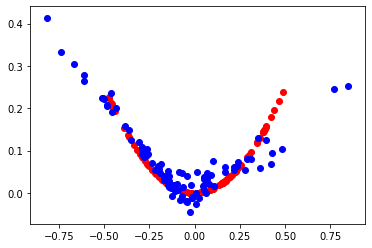

In [ ]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)